#### 다중 분류 w/ 로지스틱 회귀 

* **OvR (One vs Rest)** 분류

- 예시)

	- [0,1,2,3,4] 	=> 5개			=> 2진 분류기 5개

		0	=> 0  vs [1,2,3,4]		2진분류		=> 0일  확률<br></br>
		1	=> 1 vs [0,2,3,4]		2진분류		=> 1일  확률<br></br>
		2	=> 1 vs [0,1,3,4]		2진분류		=> 2일  확률<br></br>
		3	=> 1 vs [0,2,1,4]		2진분류		=> 3일 	확률<br></br>
		4	=> 1 vs [0,2,3,1]		2진분류		=> 4일 	확률

* **OvO (One vs One)** 분류

- 예시)

	- [0,1,2,3,4] 	=> 5개			=> 2진 분류기 10개 		=> 5* (5-1)/2*1

		- 0	=> 		0 vs 1	0 vs 2	0 vs 3	0 vs 4		<br></br>
		- 1	=>	 			1 vs 2	1 vs 3	1 vs 4		<br></br>
		- 2	=>						2 vs 3	2 vs 4		<br></br>
		- 3	=> 								3 vs 4		<br></br>
		- 4	=> 		

### 다중분류를 위한 OVR(OVA)
- 분류 클래스 개수 만큼 2진 분류기 생성 & 다중 분류 진행


In [69]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split



# 판다스 지수표기법 정지 설정
pd.options.display.float_format = '{:.5f}'.format


- 데이터셋 load_digits
	* 내장 데이터셋
	* 이미지 데이터셋 	=> 8*8 크기 이미지		=> 피쳐가 64개!!!
	* 이미지 라벨/타겟 	=> 숫자 0~9까지 총 10개 클래스

In [70]:
featureDF, targetSR = load_digits(as_frame=True, return_X_y=True)

# 이미지 픽셀: 0~255
# 픽셀값 스케일링!!
# 색상값 (이미지데이터)는 보통 픽셀크기로 나누어버림!!

featureDF = (featureDF/255)
print(f'featureDF => {featureDF.shape}, {featureDF.ndim}D \n targetSR => {targetSR.shape}, {targetSR.ndim}D')

featureDF => (1797, 64), 2D 
 targetSR => (1797,), 1D


In [71]:
targetSR.index

RangeIndex(start=0, stop=1797, step=1)

In [72]:
# 이미지 라벨 클래스 종류
targetSR.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [73]:
print('='*60,'featureDF','='*60)
print(featureDF.head(1))
print()
print('='*60,'targetSR','='*60)
print(targetSR.head(1))

============================================================ featureDF ============================================================
   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0    0.00000    0.00000    0.01961    0.05098    0.03529    0.00392   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0    0.00000    0.00000    0.00000    0.00000  ...    0.00000    0.00000   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0    0.00000    0.00000    0.02353    0.05098    0.03922    0.00000   

   pixel_7_6  pixel_7_7  
0    0.00000    0.00000  

[1 rows x 64 columns]

============================================================ targetSR ============================================================
0    0
Name: target, dtype: int32


image data shape=> (8, 8)


<function matplotlib.pyplot.show(close=None, block=None)>

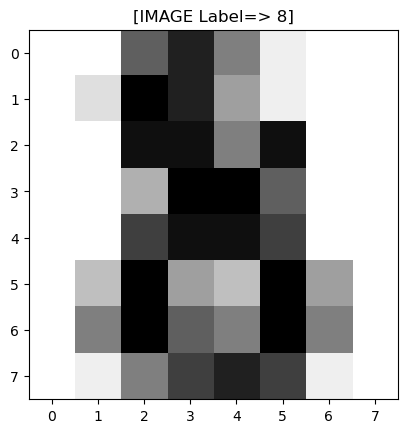

In [74]:
# 이미지 데이터 시각화
import matplotlib.pyplot as plt

## 1D ==> 2D 
imgData = featureDF.iloc[-1].to_numpy().reshape(-1,8)
print(f'image data shape=> {imgData.shape}')

plt.imshow(imgData, cmap='binary')
plt.title(f'[IMAGE Label=> {targetSR[1796]}]')					# -1 인덱싱 불가
plt.show

#### 학습용/테스트용 데이터셋 분리

In [75]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR,
                                                    random_state =10,
                                                    stratify = targetSR)

- 클래스 마다 이진 분류가 

In [76]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# estimator는 분류 알고리즘이기만 하면 상관없음!!!!
# 예시) KNN_Classifier(), SVC ...

ovr_clf = OneVsRestClassifier(estimator=LogisticRegression())
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [77]:
# 모델 파라미터
print(f'ovr_clf.estimators_: {len(ovr_clf.estimators_)}개')
print(f'ovr_clf.classes_: {ovr_clf.classes_}')
print(f'ovr_clf.n_classes_: {ovr_clf.n_classes_}')
print(f'ovr_clf.label_binarizer_: {ovr_clf.label_binarizer_}')

ovr_clf.estimators_: 10개
ovr_clf.classes_: [0 1 2 3 4 5 6 7 8 9]
ovr_clf.n_classes_: 10
ovr_clf.label_binarizer_: LabelBinarizer(sparse_output=True)


In [96]:
ovr_clf.estimators_

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

In [110]:
np.set_printoptions(precision=6, suppress=True)

from scipy.special import expit

for idx in range(ovr_clf.n_classes_):
    # 피쳐 64개에 대한 coef_ 리스트 반환
    print("="*100)
    # print(f'[{idx} 분류기]\n', ovr_clf.estimators_[idx].coef_, ovr_clf.estimators_[idx].intercept_)		
    print(f'[전체 분류기 선형식값]\n[0분류기 1분류기 2분류기 3분류기 4분류기 5분류기 6분류기 7분류기 8분류기 9분류기]\n', ovr_clf.decision_function(X_train.iloc[:1]))
    print()
    print(f'전체 분류기 확률변환값\n[0분류기 1분류기 2분류기 3분류기 4분류기 5분류기 6분류기 7분류기 8분류기 9분류기]\n',ovr_clf.predict_proba(X_train.iloc[:1]))                                       
    print(f'{idx} 분류기 이진 분류 확률을 다시 전체 다중 분류에 대한 확률로 처리한 값')
    print()
    print(f'[{idx} 분류기 선형식값]\n', ovr_clf.estimators_[idx].decision_function(X_train.iloc[:1]))
    print()
    print(f'[{idx} 분류기 확률변환값]\n[{idx}일 확률] expit(decision_func)\n', expit(ovr_clf.estimators_[idx].decision_function(X_train.iloc[:1])))
    print()
    print(f'[{idx} 분류기 확률변환값]\n[나머지일 확률 {idx}일 확률] predict_proba\n', ovr_clf.estimators_[idx].predict_proba(X_train.iloc[:1]))
    print()
    
    

[전체 분류기 선형식값]
[0분류기 1분류기 2분류기 3분류기 4분류기 5분류기 6분류기 7분류기 8분류기 9분류기]
 [[-2.50438  -2.360388 -2.258641 -1.818556 -2.491658 -1.917085 -2.100526
  -2.452999 -2.44828  -2.340241]]

전체 분류기 확률변환값
[0분류기 1분류기 2분류기 3분류기 4분류기 5분류기 6분류기 7분류기 8분류기 9분류기]
 [[0.079003 0.090183 0.098928 0.145985 0.079937 0.134043 0.114027 0.082838
  0.083199 0.091857]]
0 분류기 이진 분류 확률을 다시 전체 다중 분류에 대한 확률로 처리한 값

[0 분류기 선형식값]
 [-2.50438]

[0 분류기 확률변환값]
[0일 확률] expit(decision_func)
 [0.075552]

[0 분류기 확률변환값]
[나머지일 확률 0일 확률] predict_proba
 [[0.924448 0.075552]]

[전체 분류기 선형식값]
[0분류기 1분류기 2분류기 3분류기 4분류기 5분류기 6분류기 7분류기 8분류기 9분류기]
 [[-2.50438  -2.360388 -2.258641 -1.818556 -2.491658 -1.917085 -2.100526
  -2.452999 -2.44828  -2.340241]]

전체 분류기 확률변환값
[0분류기 1분류기 2분류기 3분류기 4분류기 5분류기 6분류기 7분류기 8분류기 9분류기]
 [[0.079003 0.090183 0.098928 0.145985 0.079937 0.134043 0.114027 0.082838
  0.083199 0.091857]]
1 분류기 이진 분류 확률을 다시 전체 다중 분류에 대한 확률로 처리한 값

[1 분류기 선형식값]
 [-2.360388]

[1 분류기 확률변환값]
[1일 확률] expit(decision_func)
 [0.086244]

[1 분류기 확률

In [79]:
ovr_clf.predict(X_test[:3])

array([3, 9, 7])

In [80]:
ovr_clf.predict_proba(X_test.iloc[:3])
# [ 클래스 10개에 대한 확률 리스트 x 3개 ]


array([[0.078773, 0.07785 , 0.117592, 0.192254, 0.046543, 0.106452,
        0.083023, 0.069872, 0.090864, 0.136776],
       [0.118287, 0.06343 , 0.079839, 0.154541, 0.065147, 0.109963,
        0.053017, 0.081382, 0.092324, 0.182071],
       [0.084959, 0.088617, 0.068084, 0.082259, 0.115483, 0.119781,
        0.059759, 0.182085, 0.093229, 0.105745]])

In [81]:
ovr_clf.predict_proba(X_test.iloc[:1]).sum(axis=1)
# 총 10개 클래스 각각의 분류 확률 총합 => 1

array([1.])

In [82]:
np.argmax(ovr_clf.predict_proba(X_test.iloc[:1]))			# 테스트 데이터셋 1번째 이미지 데이터에 대한 ovr_clf 확률값 중
															# 최대의 확률값을 가지는 인덱스!! 
															# 여기서는 인덱스가 라벨에 해당함

3

In [ ]:
np.argmax(ovr_clf.predict_proba(X_test.iloc[:1]))			# 테스트 데이터셋 1번째 이미지 데이터에 대한 ovr_clf 확률값 중
															# 최대의 확률값을 가지는 인덱스!! 
															# 여기서는 인덱스가 라벨에 해당함

In [83]:
ovr_clf.predict(np.array(X_test.iloc[:1]))

c:\Users\KDP-43\anaconda3\envs\ml_38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\KDP-43\anaconda3\envs\ml_38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\KDP-43\anaconda3\envs\ml_38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\KDP-43\anaconda3\envs\ml_38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\KDP-43\anaconda3\envs\ml_38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\KDP-43\anac

array([3])

image data shape=> (8, 8)


<function matplotlib.pyplot.show(close=None, block=None)>

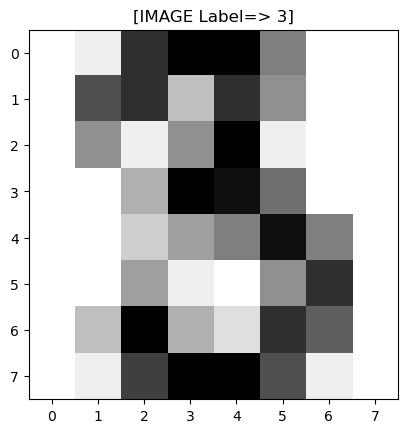

In [89]:
# 이미지 데이터 시각화
import matplotlib.pyplot as plt

## 1D ==> 2D 
imgData = X_test.iloc[:1].to_numpy().reshape(-1,8)
print(f'image data shape=> {imgData.shape}')

plt.imshow(imgData, cmap='binary')
plt.title(f'[IMAGE Label=> {y_test.iloc[0]}]')					
plt.show

In [86]:
y_test[0]						# y_test 데이터 중 인덱스 번호==0인 데이터의 라벨값

0

In [87]:
y_test

1310    3
1249    9
1523    7
1596    8
1607    4
       ..
544     8
330     5
1045    6
1613    1
1140    2
Name: target, Length: 450, dtype: int32

In [88]:
y_test.iloc[0]			# 0번째 값!!

3